In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from pandas import concat
from collections import Counter

In [3]:
dataset =pd.read_csv("Bird Strikes Test.csv")
dataset.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17184\1032958181.py:1: DtypeWarning: Columns (7,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset =pd.read_csv("Bird Strikes Test.csv")


,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,...,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,227413,No damage,2.0,NORTHWEST AIRLINES,Michigan,...,NaN,NaN,NaN,NaN,0,0,0,NaN,400,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,226578,No damage,2.0,NORTHWEST AIRLINES,Wisconsin,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,268383,Caused damage,1.0,PRIVATELY OWNED,Tennessee,...,NaN,Day,NaN,NaN,0,0,0,0.0,0,20
3,SACRAMENTO INTL,< 1000 ft,B-737-300,None,1/1/2005 0:00,229514,Caused damage,2.0,SOUTHWEST AIRLINES,California,...,2140.0,Night,Y,NaN,0,"117,135","117,135",NaN,500,142
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,225661,No damage,2.0,UNITED AIRLINES,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,NaN


In [4]:
dataset.dtypes

Airport: Name                                  object
Altitude bin                                   object
Aircraft: Make/Model                           object
Effect: Impact to flight                       object
FlightDate                                     object
Record ID                                       int64
Effect: Indicated Damage                       object
Aircraft: Number of engines?                   object
Aircraft: Airline/Operator                     object
Origin State                                   object
When: Phase of flight                          object
Wildlife: Size                                 object
Wildlife: Species                              object
When: Time (HHMM)                             float64
When: Time of day                              object
Pilot warned of birds or wildlife?             object
Cost: Aircraft time out of service (hours)     object
Cost: Other (inflation adj)                    object
Cost: Repair (inflation adj)

In [5]:
dataset['FlightDate']=pd.to_datetime(dataset['FlightDate'].str[:-5])
dataset['Year']=dataset['FlightDate'].dt.year
dataset['Month']=dataset['FlightDate'].dt.month
dataset['Month and Year']=dataset['FlightDate'].dt.strftime('%b %Y')

def get_season(month):
    if month >= 3 and month<=5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >=9 and month <=11:
        return "Fall"
    else:
        return "Winter"

In [14]:
dataset["Origin State"].unique()

array(['Michigan', 'Wisconsin', 'Tennessee', 'California', nan,
       'Prince Edward Island', 'Ohio', 'Florida', 'Louisiana', 'Georgia',
       'Kentucky', 'New York', 'Pennsylvania', 'Texas', 'Massachusetts',
       'Hawaii', 'Nebraska', 'Colorado', 'Alabama', 'Idaho', 'Virginia',
       'Connecticut', 'Washington', 'DC', 'South Carolina', 'Maryland',
       'New Mexico', 'North Dakota', 'Arizona', 'Oregon', 'Illinois',
       'Indiana', 'Utah', 'New Jersey', 'Oklahoma', 'North Carolina',
       'Alaska', 'Missouri', 'Rhode Island', 'Mississippi',
       'West Virginia', 'Nevada', 'Minnesota', 'Virgin Islands', 'Iowa',
       'New Hampshire', 'Montana', 'Arkansas', 'South Dakota',
       'Puerto Rico', 'Kansas', 'Wyoming', 'Maine', 'Vermont',
       'British Columbia', 'Ontario', 'Quebec', 'Delaware', 'Alberta',
       'Manitoba', 'Newfoundland and Labrador', 'Saskatchewan',
       'Nova Scotia'], dtype=object)

In [15]:
def get_region(state):
    if state in('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'):
        return 'Northeast'
    elif state in ('Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'):
        return 'Midwest'
    elif state in ('DC', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia'):
        return 'South'
    elif state in ('Alaska', 'California', 'Hawaii', 'Oregon', 'Washington', 'Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming'):
        return 'West'
    elif state == 'Virgin Islands':
        return 'Virgin Islands'
    elif state == 'Puerto Rico':
        return 'Puerto Rico'
    else:
        return 'Canada'


In [16]:
dataset['Region']=dataset["Origin State"].apply(get_region)
dataset["Season"]=dataset["Month"].apply(get_season)

In [20]:
strikes_per_year =Counter(dataset['Year'])
years=list(strikes_per_year.keys())
strikes_years = list(strikes_per_year.values())

In [21]:
strikes_per_season=Counter(dataset["Season"])
seasons=list(strikes_per_season.keys())
strikes_seasons=list(strikes_per_season.values())

In [22]:
strikes_per_tod=Counter(dataset["Month"])
tod=list(strikes_per_tod.keys())
strikes_tod=list(strikes_per_tod.values())

In [25]:
strikes_per_damage=Counter(dataset['Effect: Indicated Damage'])
damages=list(strikes_per_damage.keys())
strikes_damage=list(strikes_per_damage.values())

In [26]:
strikes_per_size =Counter(dataset['Wildlife: Size'])
size= list(strikes_per_size.keys())
strikes_size=list(strikes_per_size.values())

strikes_per_phase = Counter(dataset['When: Phase of flight'])
phase= list(strikes_per_phase.keys())
strikes_phase=list(strikes_per_phase.values())

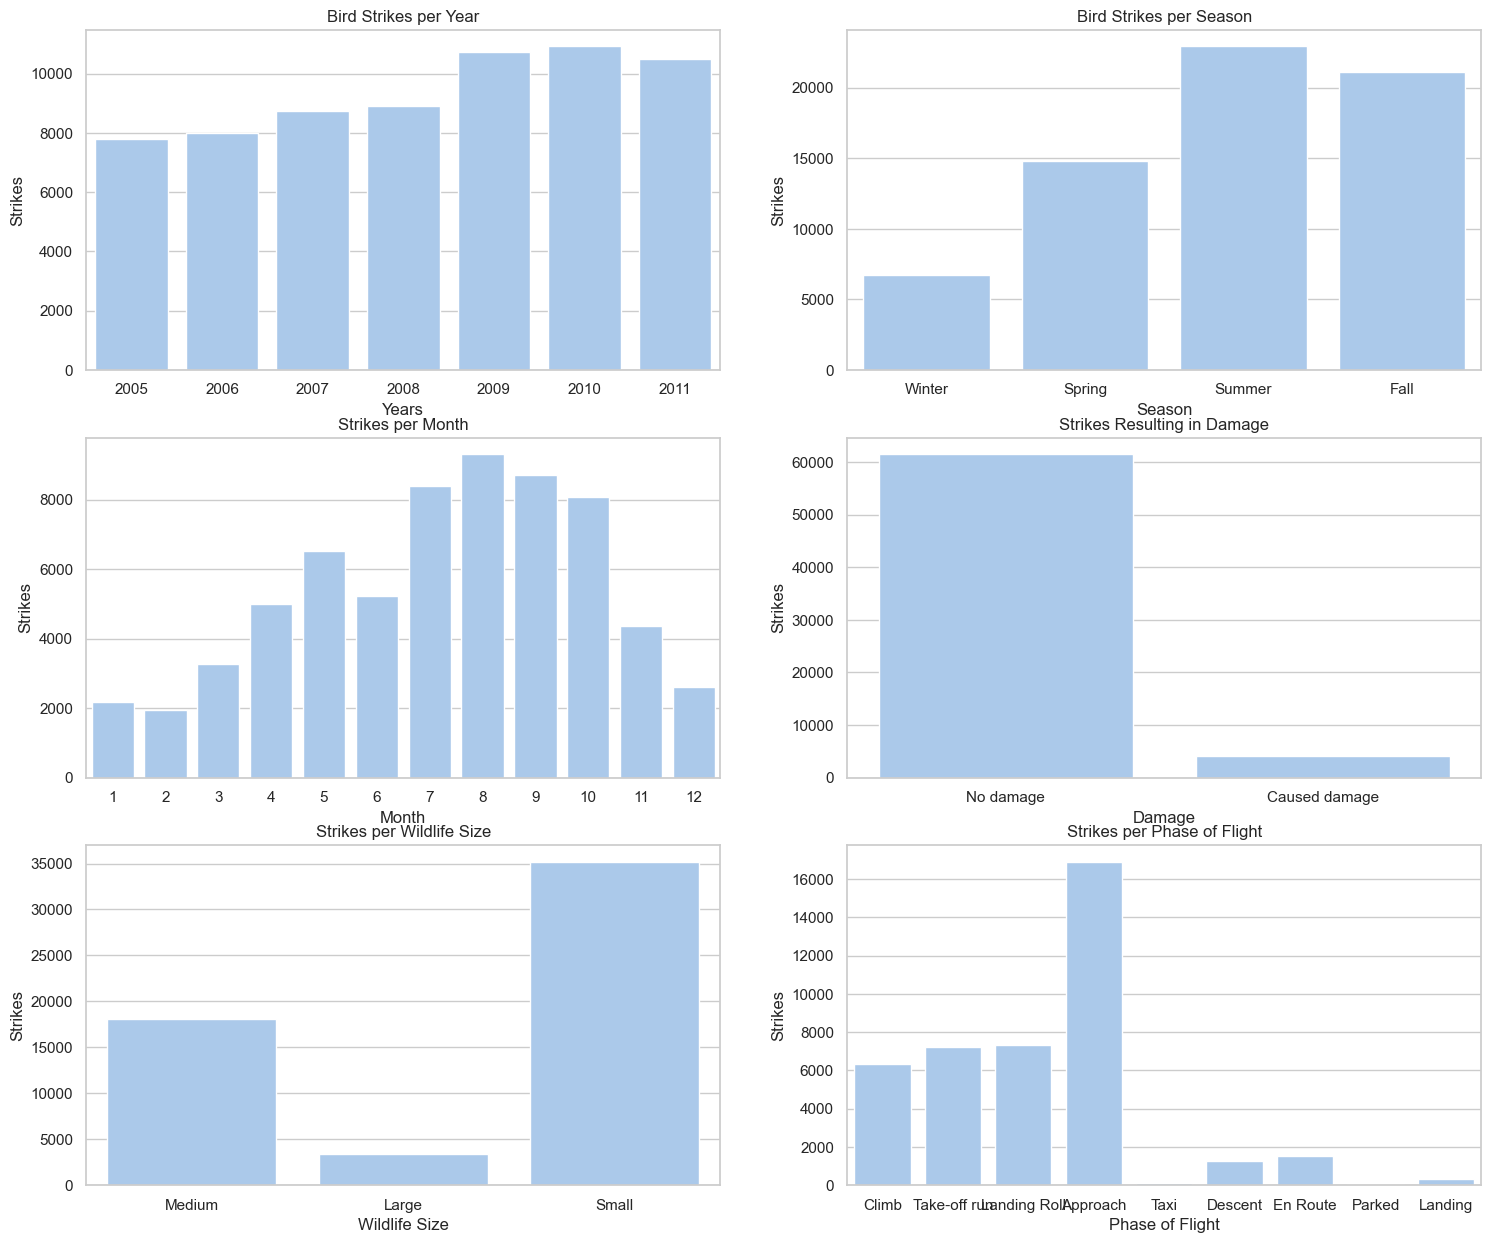

In [30]:
fig=plt.figure(figsize=(18,15))
ax1= fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

sns.barplot(x=years, y=strikes_years, color='b', ax=ax1)
ax1.set(ylabel='Strikes', xlabel='Years', title='Bird Strikes per Year')

sns.barplot(x=seasons, y=strikes_seasons, color='b', ax=ax2)
ax2.set(ylabel='Strikes', xlabel='Season', title='Bird Strikes per Season')

sns.barplot(x=tod, y=strikes_tod, color='b', ax=ax3)
ax3.set(ylabel='Strikes', xlabel='Month', title='Strikes per Month')

sns.barplot(x=damages, y=strikes_damage, color='b', ax=ax4)
ax4.set(ylabel='Strikes', xlabel='Damage', title='Strikes Resulting in Damage')

sns.barplot(x=size, y=strikes_size, color='b', ax=ax5)
ax5.set(ylabel='Strikes', xlabel='Wildlife Size', title='Strikes per Wildlife Size')

sns.barplot(x=phase, y=strikes_phase, color='b', ax=ax6)
ax6.set(ylabel='Strikes', xlabel='Phase of Flight', title='Strikes per Phase of Flight')

plt.show()

In [31]:
strikes_per_impact= Counter(dataset['Effect: Impact to flight'])
impacts=list(strikes_per_impact.keys())
impact_strikes=list(strikes_per_impact.values())

In [33]:
strikes_per_damage=Counter(dataset['Effect: Indicated Damage'])
damages=list(strikes_per_damage.keys())
damage_strikes=list(strikes_per_damage.values())

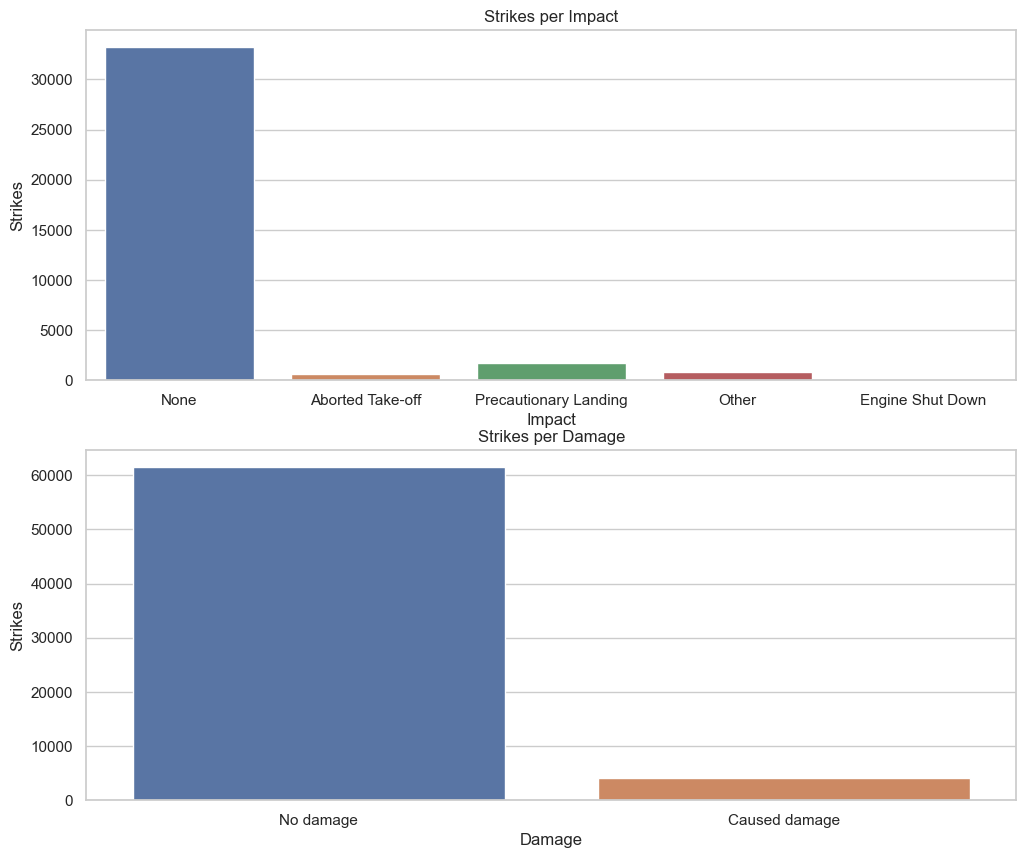

In [35]:
fig=plt.figure(figsize=(12,10))

ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)             
sns.barplot(x=impacts, y=impact_strikes, ax=ax1)
ax1.set(ylabel='Strikes', xlabel='Impact', title='Strikes per Impact')
                        
sns.barplot(x=damages, y=damage_strikes, ax=ax2)
ax2.set(ylabel='Strikes', xlabel='Damage', title="Strikes per Damage")
plt.show()

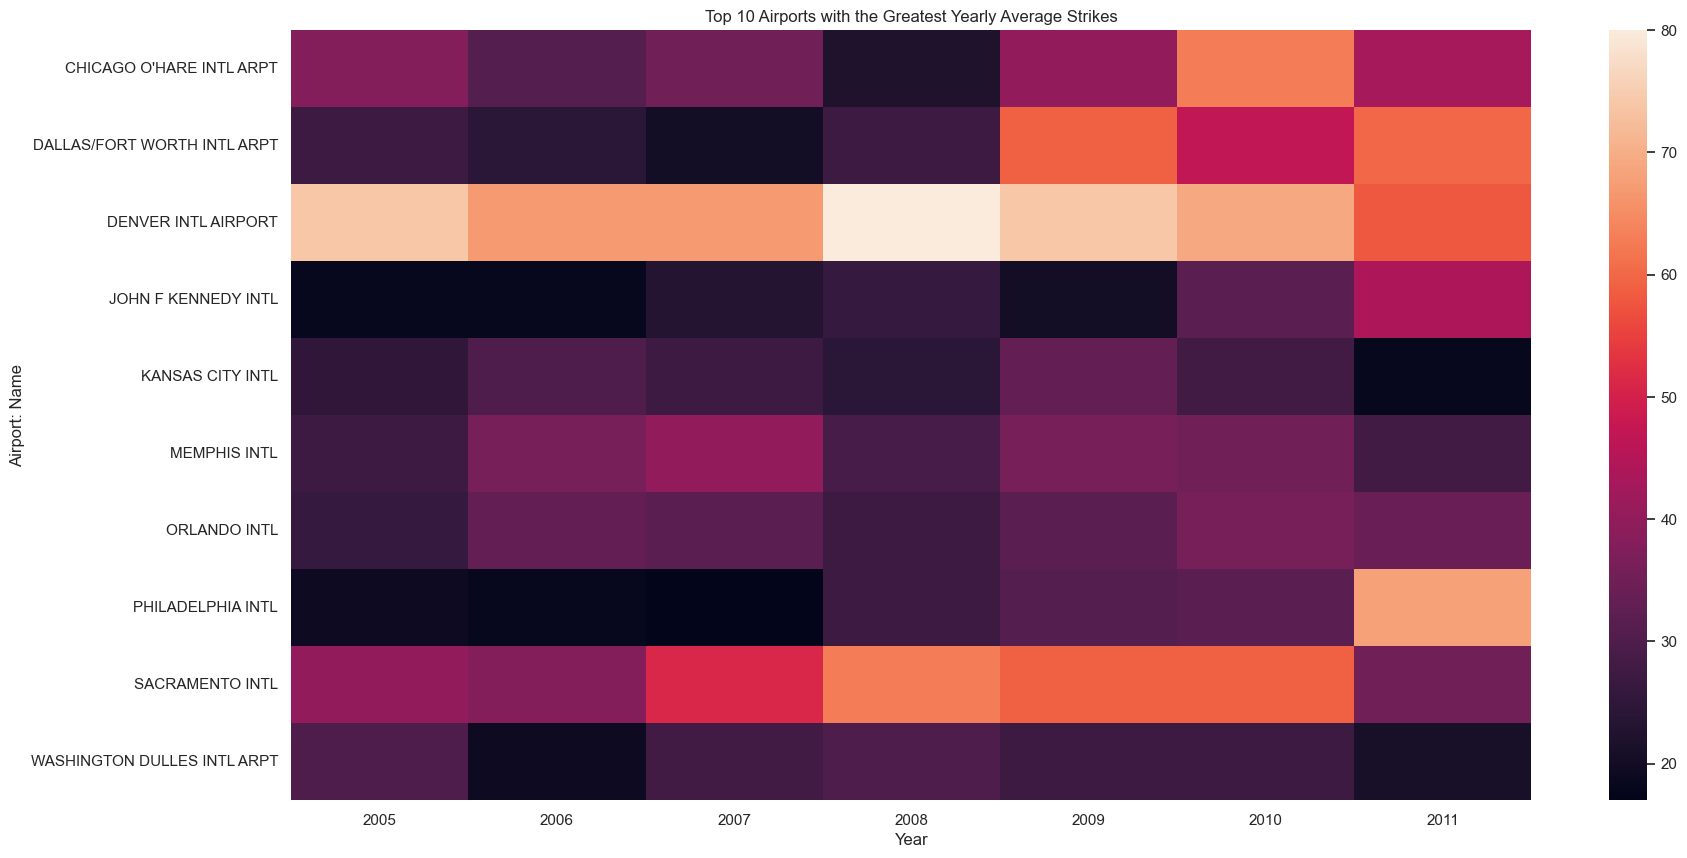

In [52]:
airport_yr_tot = dataset.loc[dataset['When: Phase of flight'].isin(['Climb', 'Take-off run', 'Parked', 'Taxi'])].groupby(
    ['Year', 'Airport: Name']).size().reset_index(name='Yearly Strikes')

airport_yr_avg = airport_yr_tot.groupby(['Airport: Name'])['Yearly Strikes'].mean().reset_index(name='Yearly Avg')

airport_total = dataset.loc[dataset['When: Phase of flight'].isin(['Climb', 'Take-off run', 'Parked', 'Taxi'])].groupby(
    ['Airport: Name']).size().reset_index(name='Total Strikes')

airport = pd.merge(airport_yr_tot, airport_total, on='Airport: Name')
airport = pd.merge(airport, airport_yr_avg, on='Airport: Name')
airport = airport.sort_values('Yearly Avg', ascending=False).head(70)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)

sns.heatmap(airport.pivot_table(index='Airport: Name', columns='Year', values='Yearly Strikes'), ax=ax1)
ax1.set(xlabel='Year', title='Top 10 Airports with the Greatest Yearly Average Strikes')
plt.show()


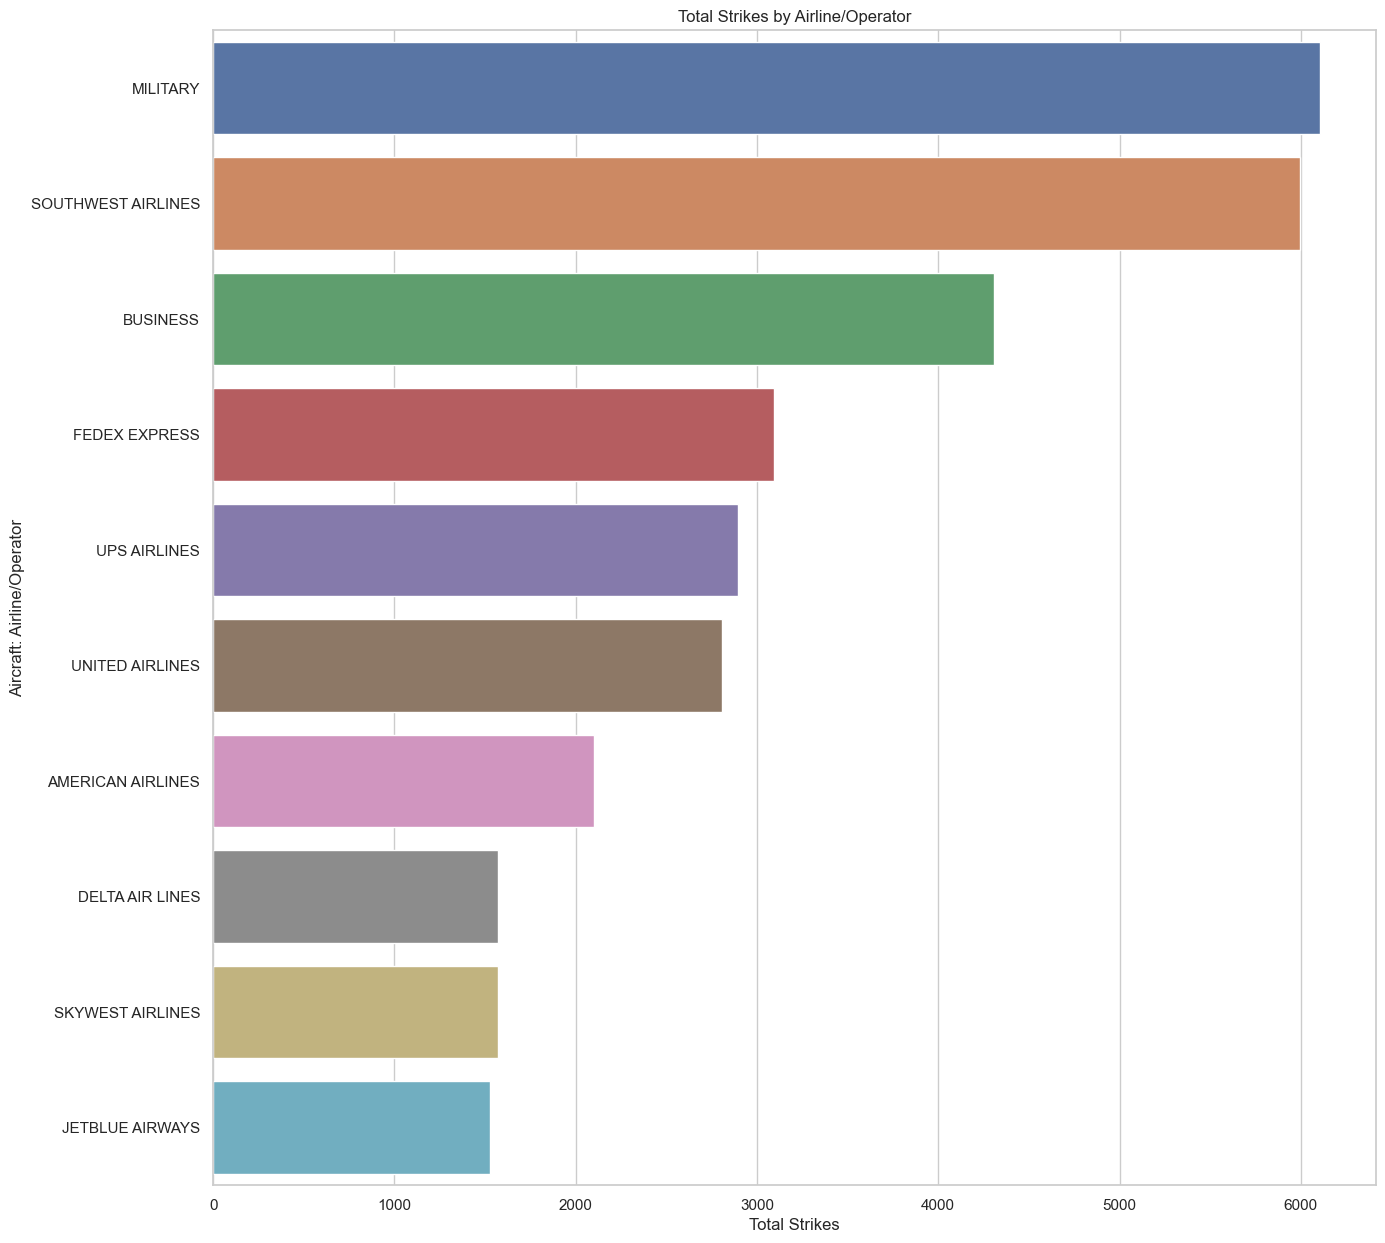

In [55]:
airline_strikes=dataset.groupby(['Aircraft: Airline/Operator']).size().to_frame('Total Strikes')
airline_strikes.reset_index(level=0, inplace=True)

fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(111)
airline_strikes.sort_values(['Total Strikes'], inplace=True, ascending=False)
airline_strikes=airline_strikes.loc[airline_strikes['Aircraft: Airline/Operator'] != 'UNKNOWN'].head(10)
sns.barplot(x='Total Strikes', y='Aircraft: Airline/Operator', data=airline_strikes, ax=ax1)
ax1.set(xlabel='Total Strikes', title='Total Strikes by Airline/Operator')
plt.show()

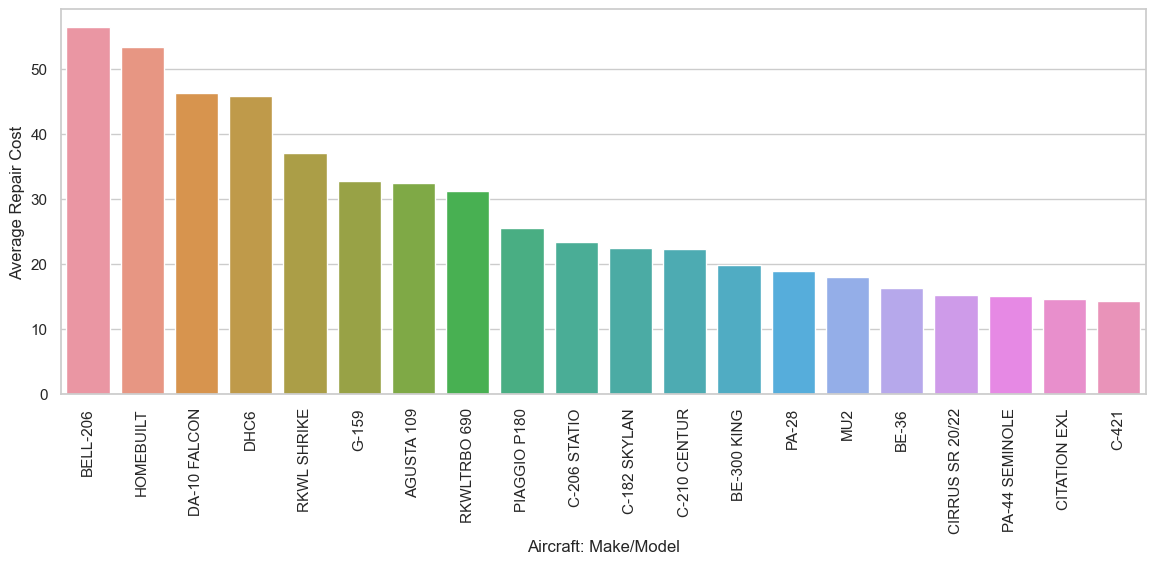

In [63]:
avgcost_byplane = dataset.groupby(['Aircraft: Make/Model'])['Cost: Repair (inflation adj)'].mean().reset_index(name='Average Repair Cost')
strikes_byplane = dataset.groupby(['Aircraft: Make/Model']).size().reset_index(name='Total Strikes')

byplane = pd.merge(strikes_byplane, avgcost_byplane, on='Aircraft: Make/Model')
byplane = byplane.sort_values('Average Repair Cost', ascending=False).loc[byplane['Total Strikes'] > 10].head(20)

fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(111)
plt.xticks(rotation=90)

sns.barplot(x=byplane['Aircraft: Make/Model'], y=byplane['Average Repair Cost'], ax=ax1)
plt.show()

In [ ]:
strikes_per_moyr=dataset.groupby(['Month and Year', 'Year', 'Month']).size().to_frame('Total Strikes')
strikes_per_moyr.reset_index(level=[0,1,2], inplace=True)
strikes_per_moyr.sort_values(['Year', 'Month'], inplace=True)
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
plt.xticks(rotation=90)
sns.pointplot(x='Month and Year', y='Total Strikes', data=strikes_per_moyr, ax=ax1)
plt.show()

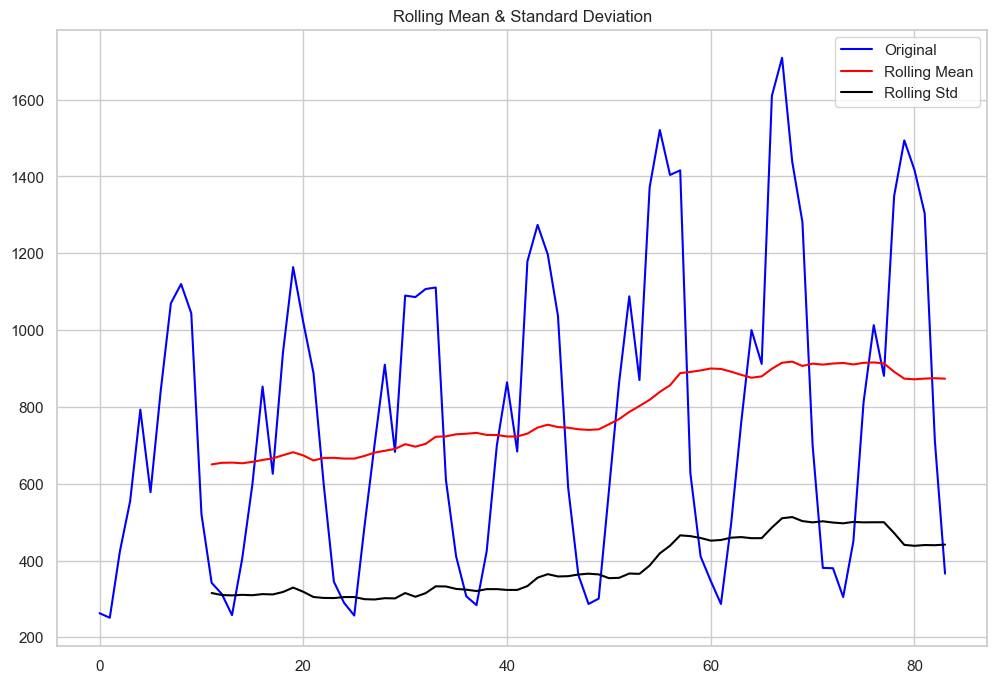

Results of Dickey-Fuller Test:
(84,)
Test Statistic                 -0.953727
p-value                         0.769765
#Lags Used                     12.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [65]:
strikes_per_moyr=strikes_per_moyr[['Month and Year', 'Total Strikes']]
strikes_per_moyr.reset_index(inplace=True)
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    print(timeseries.shape)
    dftest = adfuller(timeseries.values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 
test_stationarity(strikes_per_moyr['Total Strikes'])


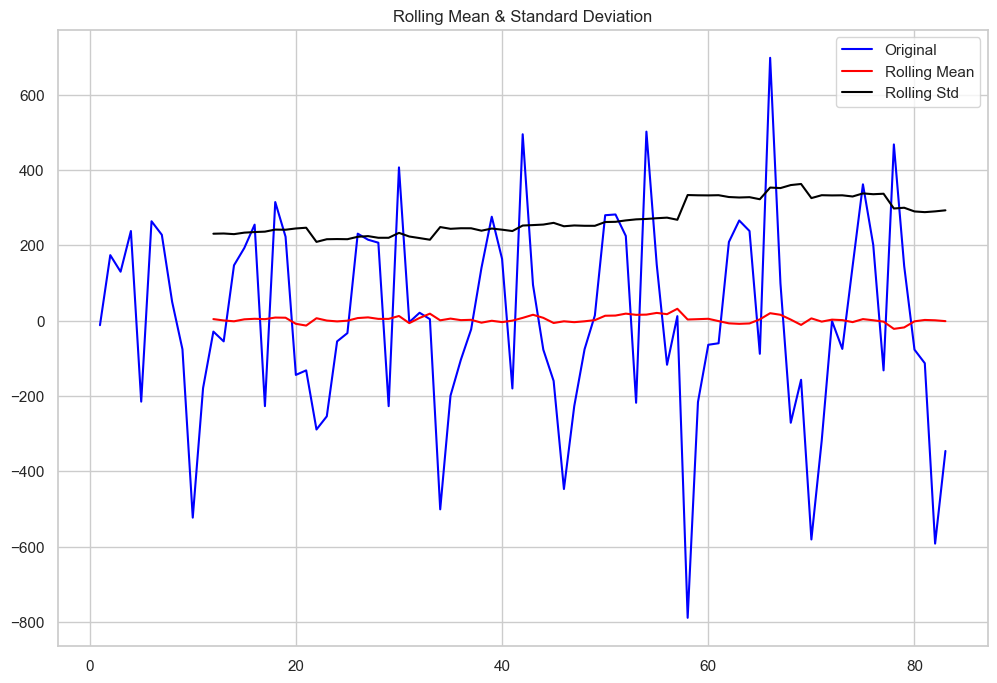

Results of Dickey-Fuller Test:
(83,)
Test Statistic                 -4.318867
p-value                         0.000412
#Lags Used                     11.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [66]:
 strikes_per_moyr["first_difference"]=strikes_per_moyr['Total Strikes']-strikes_per_moyr['Total Strikes'].shift(1)
 test_stationarity(strikes_per_moyr['first_difference'].dropna())

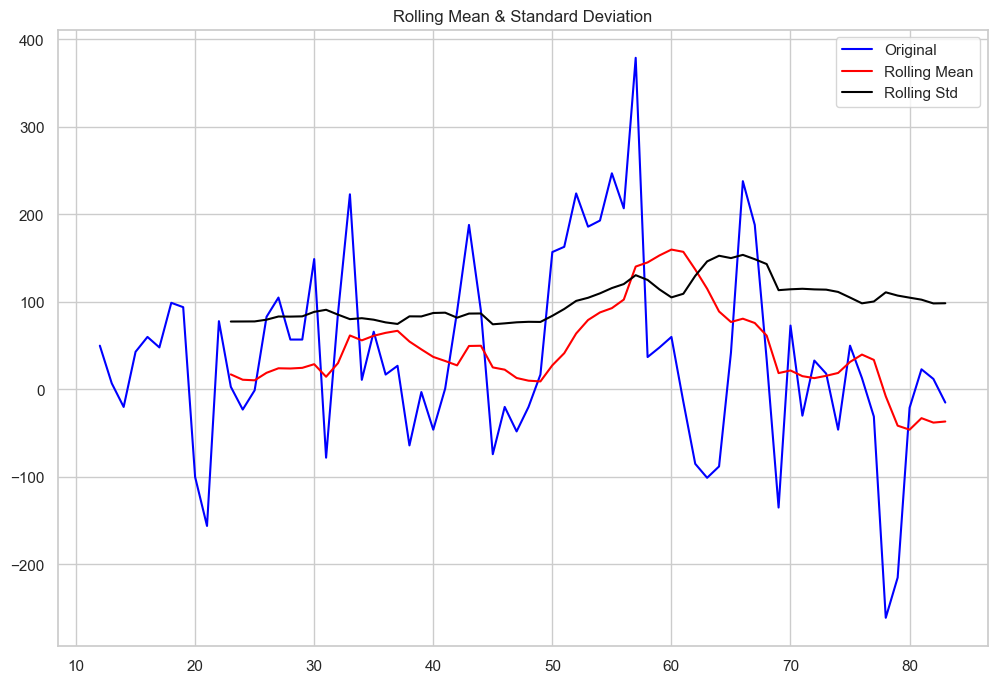

Results of Dickey-Fuller Test:
(72,)
Test Statistic                 -1.427111
p-value                         0.569212
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [67]:
 strikes_per_moyr["seasonal_difference"]=strikes_per_moyr['Total Strikes']-strikes_per_moyr['Total Strikes'].shift(12)
 test_stationarity(strikes_per_moyr['seasonal_difference'].dropna())

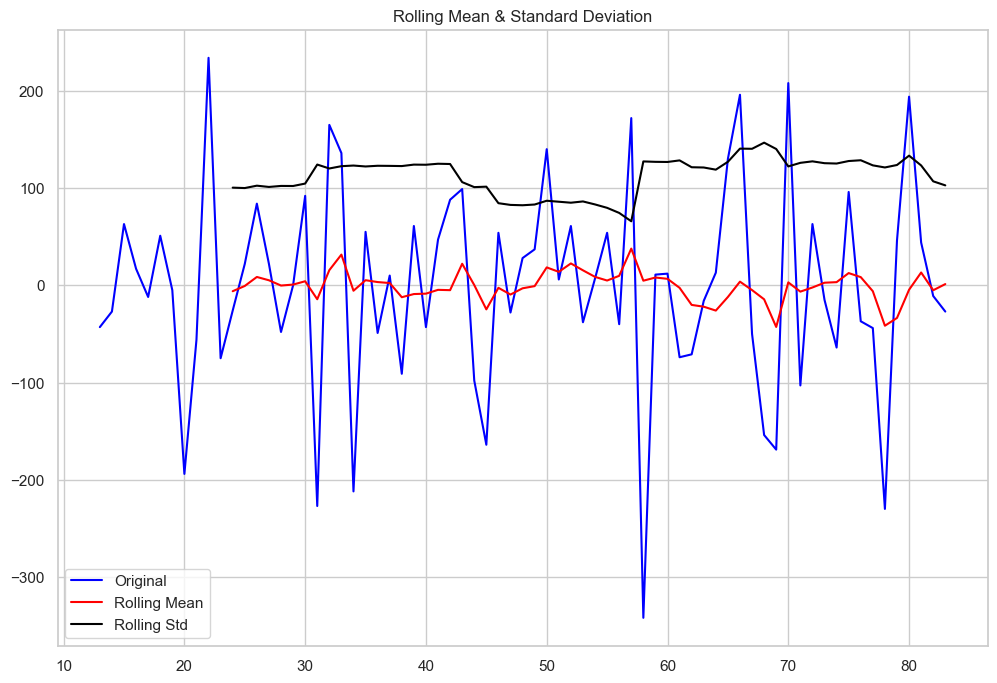

Results of Dickey-Fuller Test:
(71,)
Test Statistic                 -3.850470
p-value                         0.002431
#Lags Used                     11.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [69]:
strikes_per_moyr["seasonal_first_difference"]=strikes_per_moyr['first_difference']-strikes_per_moyr['first_difference'].shift(12)
test_stationarity(strikes_per_moyr['seasonal_first_difference'].dropna())

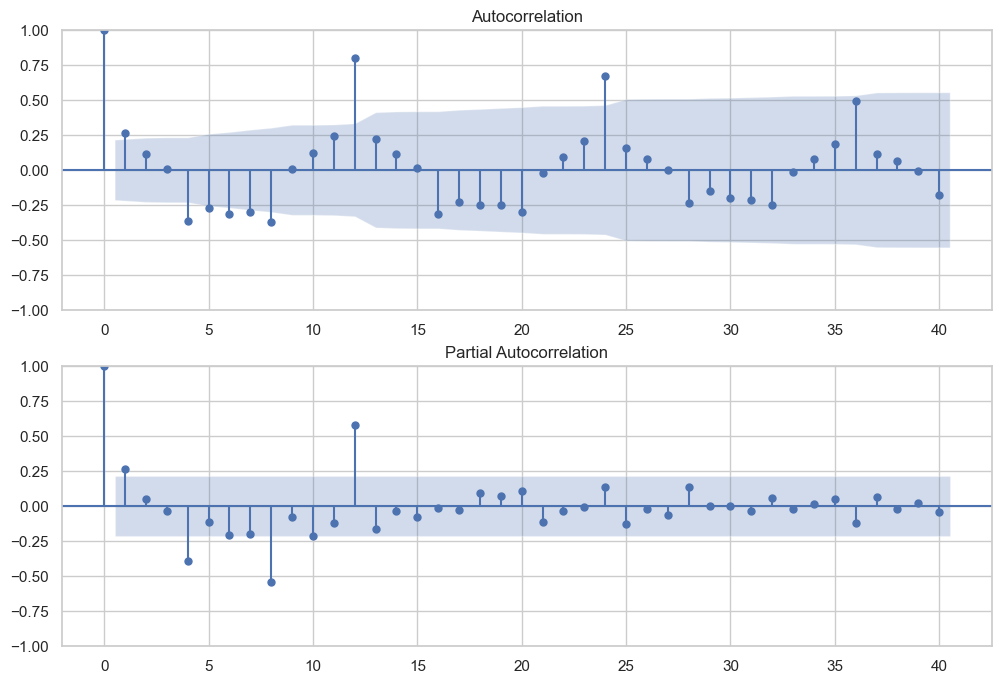

In [70]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(strikes_per_moyr.first_difference.iloc[1:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(strikes_per_moyr.first_difference.iloc[1:], lags=40, ax=ax2)

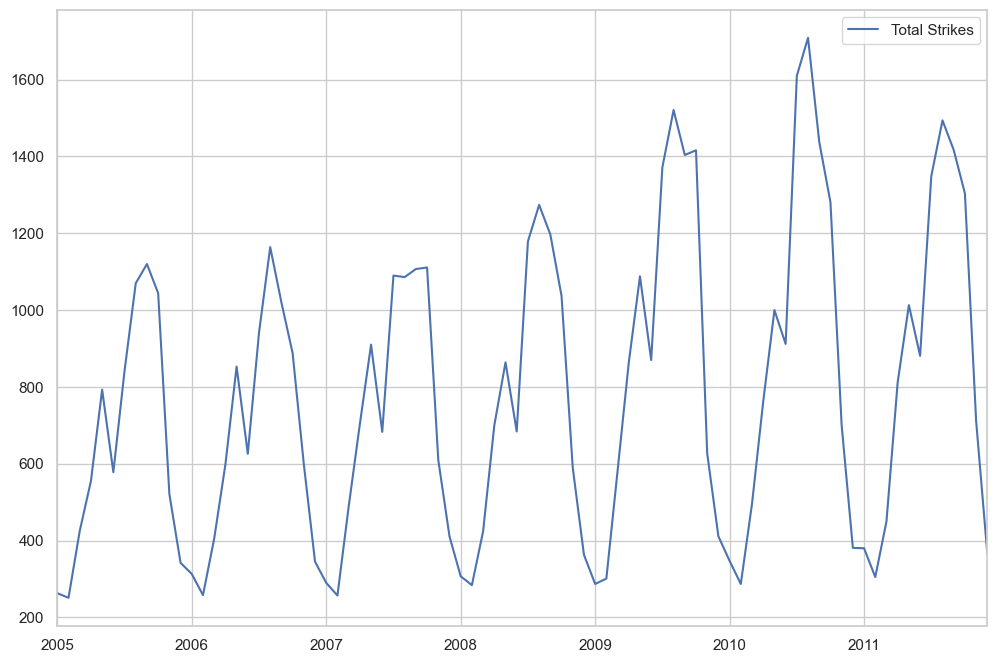

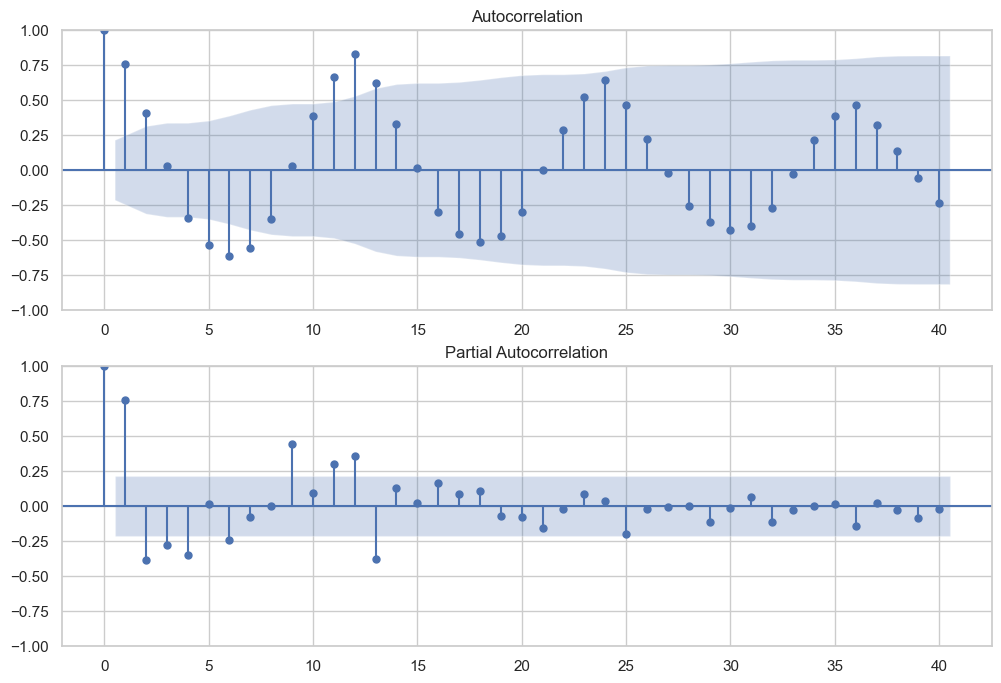

In [72]:
dta= strikes_per_moyr[['Total Strikes']]
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2005m1', '2011m12'))

dta.plot(figsize=(12,8));
sm.stats.durbin_watson(dta)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)